<a href="https://colab.research.google.com/github/Lagc93/Senales_Y_Sistemas/blob/main/EJERCICIOS_CARPETAS_1_IntroduccionSyS_2__SLIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import ipywidgets
from ipywidgets import interact
from scipy.spatial.distance import cdist
from scipy.spatial import distance
from sympy import Symbol
from sympy import sin, cos
from sympy import oo
from sympy import *
from numpy import exp, pi, arange, real, imag, abs, angle, sqrt
from numpy import sin, sqrt, cos
from scipy import signal
from matplotlib import animation, rc
from IPython.display import HTML

##**1_IntroNumpy_SyS.ipynb**



*   **Después de acondicionar las señales ilustradas en el presente cuaderno, simule un proceso de discretización con $F_s \geq 2 F_o.$ Dibuje el resultado de la señal discretizada utilizando la función stem**.





<StemContainer object of 3 artists>

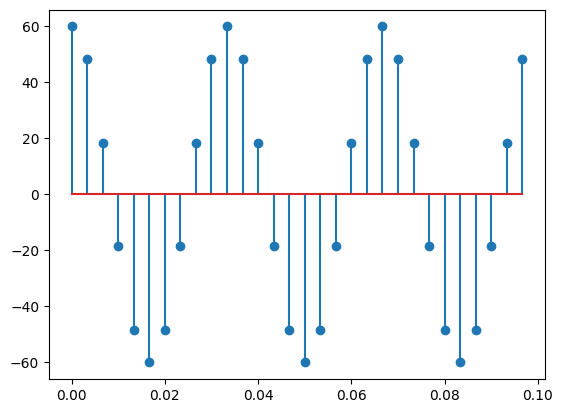

In [54]:
import numpy as np
import matplotlib.pyplot as plt

Amplitud=60
frecuencia=30
periodo=1/frecuencia          #Definiendo parametros para construir la señal
ti=0
tf=3*periodo
k=500             #cantidad de muestras para la señal continua
tv=np.linspace(ti,tf,k)
xv = Amplitud * np.cos(2*frecuencia*np.pi*tv) #vector de amplitud

frecuencia_muestreo=10*frecuencia     #frecuencia de muestreo 10 veces la original





n=np.arange(ti,tf,1/frecuencia_muestreo)  #Cantidad de Muestras

xn=Amplitud*np.cos(2*np.pi*frecuencia*n) #Amplitud de muestra

plt.stem(n,xn)




*  **Consultar el funcionamiento de los métodos cdist y argmin**






*   La funcion cdist recibe dos arreglos y entrega la distancia entre los puntos de ambos arreglos utilizando la métrica que el usuario escoja.Este método se utiliza para calcular distancias entre pares de puntos en espacios métricos. Es especialmente útil cuando tienes dos conjuntos de puntos y quieres calcular todas las distancias posibles entre un punto de un conjunto y un punto del otro conjunto.


* La funcion arming nos arroja el menor valor de un arreglo de numeros o una matriz.Se utiliza para encontrar el índice del valor mínimo en un array de NumPy. En otras palabras, devuelve la posición del elemento más pequeño en un array. Esto es útil cuando necesitas determinar la ubicación exacta del valor mínimo dentro de un conjunto de datos. Por ejemplo, encontrar el índice del elemento más cercano a un valor específico en un array.

* **Realice una función mediante el ambiente def que permita realizar los procesos de discretización y cuantización (usando cdist y argmin) en cascada. Presente las gráficas de la señal original, señal con cero y pendiente, señal discretizada, y señal digital.**

In [55]:
def my_ceropen(x,ymin = 0, ymax = 5): #reciclando la funcion cero y pendiente hecha en clase
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv  #funcion con valores max y min definidos




def discretizar_cuantizar_graficar(A,f,fs,nbits,ymaxima,yminima): #La función recibe la Amplitud (A) la frecuencia(f) la cantidad de bits(nbits) y los valores
                                                               #máximos y mínimos de la amplitud de señal (ymaxima y yminima respectivamente)

 "---------------Definir función---------------"
 import numpy as np
 import matplotlib.pyplot as plt
 from scipy.spatial.distance import  cdist

 T_o=1/f           #Definiendo parametros para construir la señal
 ti=0
 tf=3*T_o
 k=500             #cantidad de muestras para la señal continua
 tv=np.linspace(ti,tf,k)
 xv = A * np.cos(2*f*np.pi*tv) #vector de amplitud
 yv=my_ceropen(xv,yminima,ymaxima)  #Definiendo un valor de amplitud máximo y mínimo


 "-----------------DISCRETIZAR-----------------"

 n=np.arange(ti,tf,1/fs)  #Cantidad de Muestras

 xn=A*np.cos(2*np.pi*f*n) #Amplitud de muestras

 yn=my_ceropen(xn,yminima,ymaxima)   #Calculando 0 y pendiente para tener la funcion en los limites


 "-----------------CUANTIZAR-----------------"

 rmin = yminima

 rmax = ymaxima

 ve = np.linspace(rmin,rmax,2**nbits) # Calculando la cantidad de cajones dado el numero de bits

 d = cdist(yn.reshape(-1,1),ve.reshape(-1,1)) #  calculando la distancia entre cada muestra y los intervalos de bits                                       ¨duda¨

 ind = np.argmin(d,axis=1) #calculando la mejor aproximación entre el valor real y el digital                                                              ¨duda¨


 "----------------GRAFICAR--------------------"

 plt.subplot(311)
 plt.plot(tv,xv,".r")

 plt.subplot(312)
 plt.plot(tv,yv,".y")

 plt.subplot(313)
 plt.stem(n,ve[ind])  #graficando las muestras de tiempo discreto contra la menor amplitud para cada caso

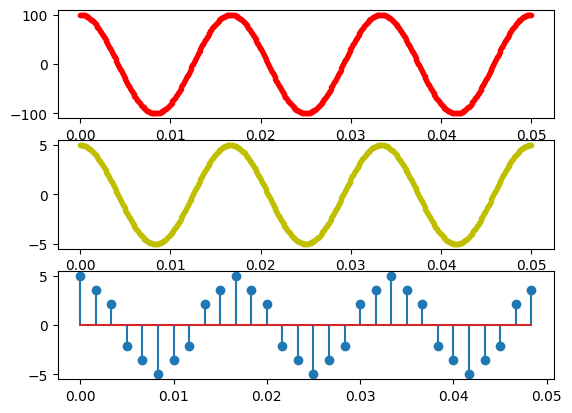

In [56]:
discretizar_cuantizar_graficar(100,60,600,3,5,-5)

##**2_Señales_estandar**
* **Pruebe otros valores de omega y sigma para crear señales con amplitud creciente/decreciente/constante y diferentes frecuencias angulares**.

In [57]:
"""
Codigo para crear señales con amplitud constante creciente y decreciente

"""
import sympy as sym

sym.init_printing() #se inicializa para mostrar en pantalla ¨duda¨

t,omega,sigma=sym.symbols("t omega sigma" ,real=True)


"""Para crear varias señales se hará una función dependiente de omega t y sigma"""

def señales(omega,sigma):
  señal_1=sym.exp(t*((1j*omega) + sigma))
  sym.plot(sym.re(señal_1.subs({omega:omega,sigma:sigma})),(t,-5,5))


* **Cuando $\sigma<0$ obtenemos una grafica en la cual su onda va disminuyendo su oscilacion cada vez más**.

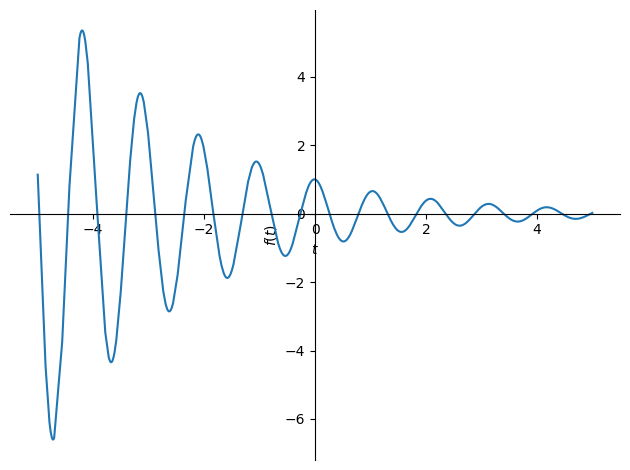

In [58]:
señales(6,-0.4)

* **Cuando $\sigma > 0$ podemos observar en la grafica que su oscilacion aumenta**.

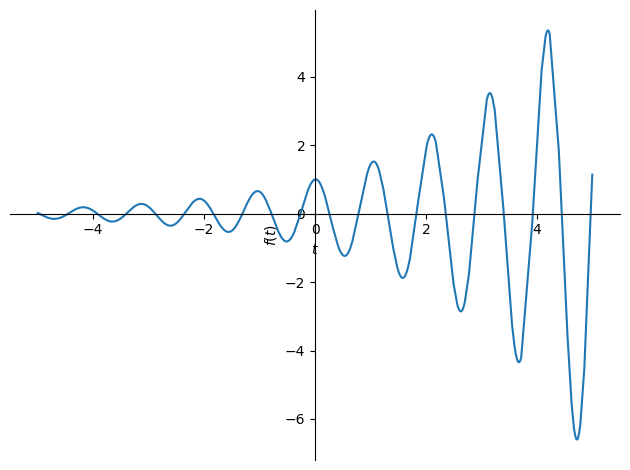

In [59]:
señales(6,0.4)

* **Cuando $\sigma = 0$ su oscilacion es constant**e.

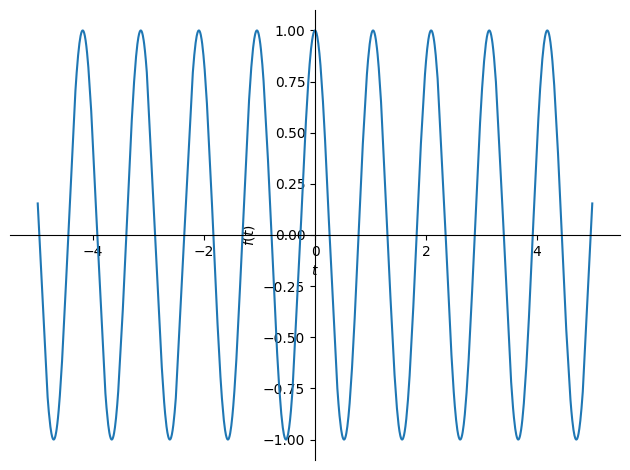

In [60]:
señales(6,0)


##**2_Señales_estandar**


* **Compruebe la propiedad de selectividad, para un
impulso de Dirac desplazado $\delta(t-\tau)$ y probar los resultados modificando el ejemplo anterior**.


In [61]:
tau = sym.symbols('tau ', real=True)
g = t**2+3*sym.cos(2*t)      # t ya esta definido
delta_T = sym.DiracDelta(t-2) # delta(t-tau) en +2 se activaria el impulso
m=((sym.integrate(delta_T*g, (t, -sym.oo, sym.oo))))  # se desarrola la funcion                                #duda como seria la grafica del impulso
print(m)

3*cos(4) + 4


## **2_Señales_estandar**
* **Use la función $\text{rect}(t)$ para construir una función $\cos(\omega t)$ con $\omega=2$, la cual se enciende en $t=-\frac{1}{2}$ y se apaga en $t=+\frac{1}{2}$**

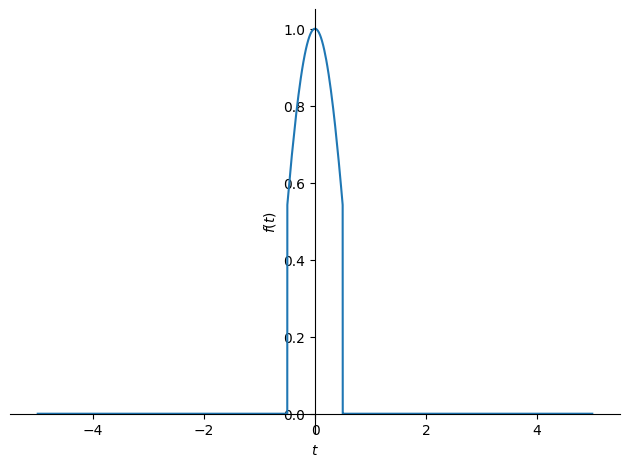

In [62]:
m=(sym.Heaviside(t+1/2)-sym.Heaviside(t-1/2))  #el primer heaviside nos dice donde se enciende la señal y el segundo
señal=sym.cos(2*t)                              # nos dice donde se apaga la señal
sym.plot(señal*m,(t,-5,5))

##**2_Señales_estandar**
* **Genere un rectificador de onda completa utilizando la función $\text{sgn}(t)$**

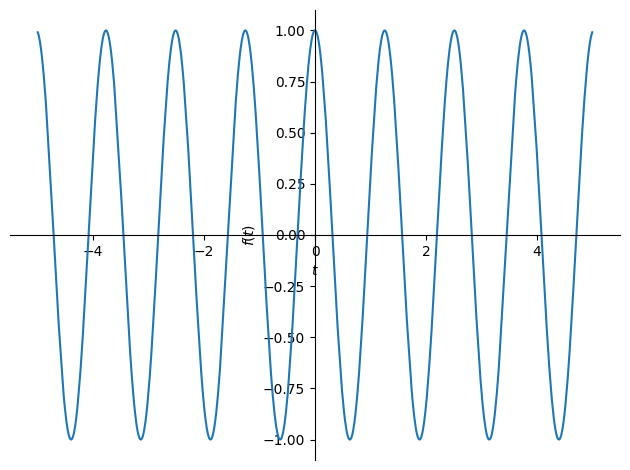

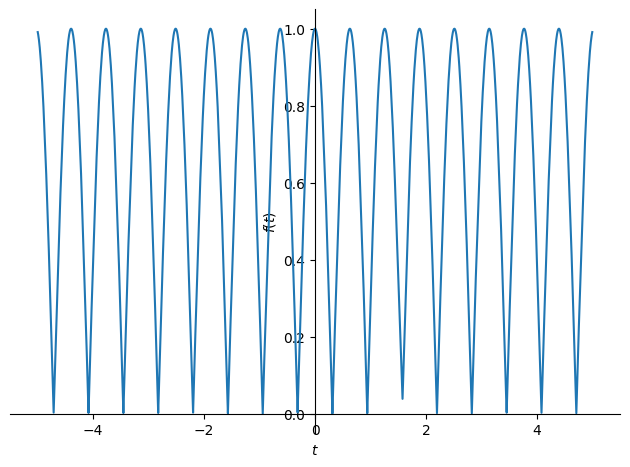

In [63]:
señal1=sym.cos(5*t)
señal=señal1*sym.sign(señal1)
sym.plot(señal1,(t,-5,5)) # nos entrega la grafica de la funcion sin rectificar
sym.plot(señal,(t,-5,5))  # nos entrega la grafica de la funcion sin funion rectificada

# **3_Operaciones_señales_continuas**

* **Agregar otro escalón al principio de la señal escalera modificando el ejemplo anterior.**

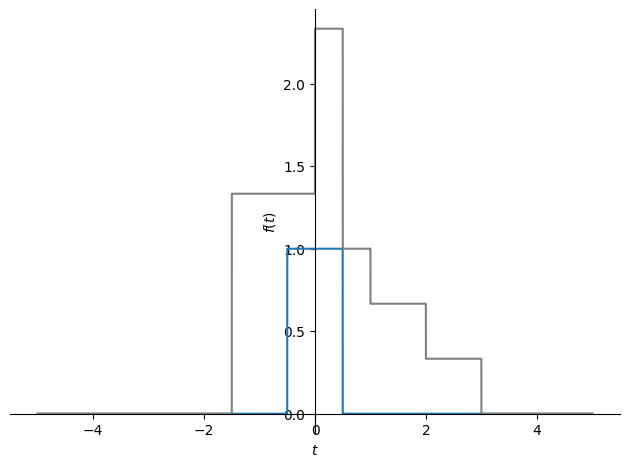

In [64]:
rect = sym.Heaviside(t + 1/2) - sym.Heaviside(t - 1/2)

#los rect desplazados se acoplan con escalamientos diferentes
x =4/3*rect.subs(t,1/2*(t+1/2))+ rect.subs(t, t-1/2) + 2/3*rect.subs(t, t-3/2) + 1/3*rect.subs(t, t-5/2)
px=sym.plot(rect,(t,-5,5),show=False)
p=sym.plot(x,(t, -5, 5),line_color='gray',show=False)
px.extend(p)
px.show()

#**3_Operaciones_señales_continuas**
* **Modifique el ejemplo anterior para que la señal se comprima**.


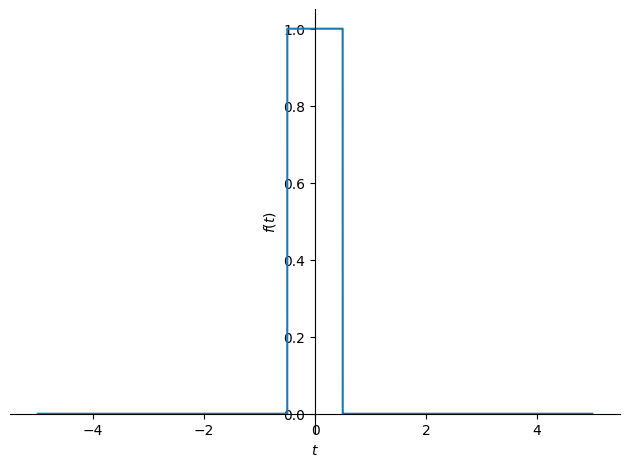

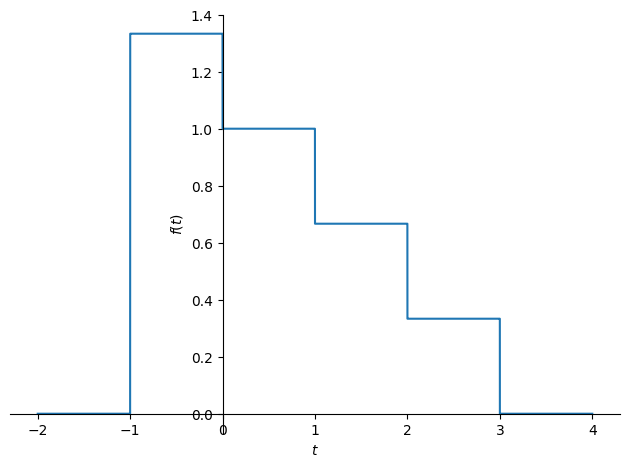

In [65]:
rect = sym.Heaviside(t + (1/2)) - sym.Heaviside(t - (1/2))
sym.plot(rect,(t,-5,5))
#los rect desplazados se acoplan con escalamientos diferentes
x =4/3*rect.subs(t,(t+(1/2)))+ rect.subs(t,(t-(1/2))) + 2/3*rect.subs(t,t-(3/2)) + 1/3*rect.subs(t, (t-(5/2)))
sym.plot(x,(t, -2, 4))

#**3_Operaciones_señales_continuas**
* **Modifique el ejemplo anterior para que la señal se escale y se invierta. ¿Qué factor de escala ada como resultado un estiramiento/compresión en este contexto?**

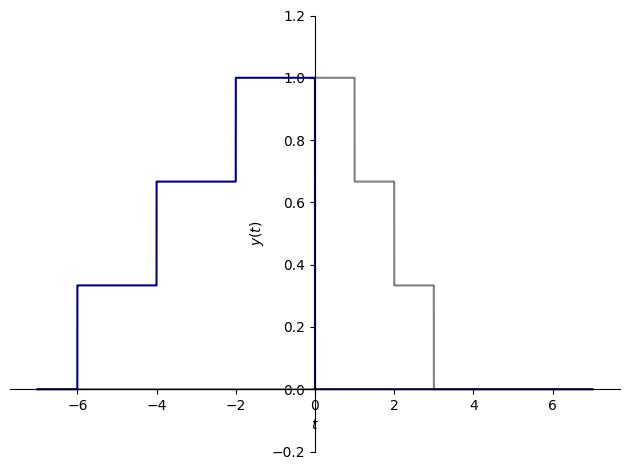

In [66]:
#@title Señal escalada e invertida
a = sym.symbols('a', real=True)
x = rect.subs(t, t-1/2) + 2/3*rect.subs(t, t-3/2) + 1/3*rect.subs(t, t-5/2)
y = x.subs(t, a*t)

#Hacer que dentro del mismo gráfico muestre ambas líneas.
px = sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False, line_color='gray')
py = sym.plot(y.subs(a,-0.5), (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False,line_color='darkblue')
px.extend(py)#se extiende los gráficos sobre una misma figura
px.show()


Para que valor de T
, ¿la señal comienza en t=0
?
R//Para que la señal comience en t=0, se debe tener un valor de  τ=0  esto con el fin de que la señal no se desplace

Realice un cambio temporal dividiendo en dos operaciones consecutivas: (i) Inversión temporal y (ii) Desplazamiento temporal.

##**DESPLAZAMIENTO TEMPORAL**

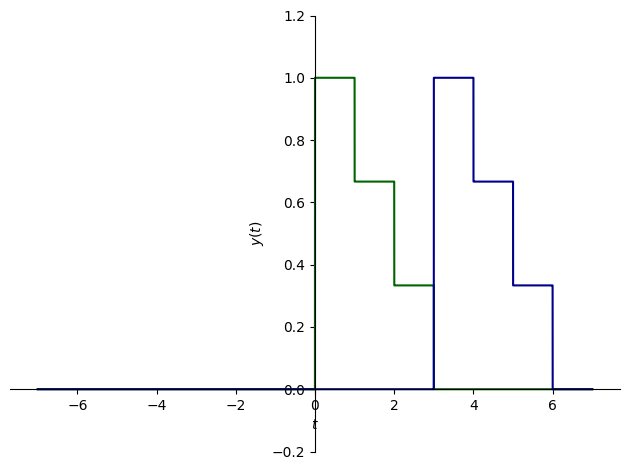

In [67]:
#@title Desplazamiento temporal
tau =-3
t=sym.symbols('t')

rect = sym.Heaviside(t + 0.5) - sym.Heaviside(t - 0.5)

#los rect desplazados se acoplan con escalamientos diferentes
x = rect.subs(t, t-1/2) + 2/3*rect.subs(t, t-3/2) + 1/3*rect.subs(t, t-5/2)
y = x.subs(t, t+tau)

px=sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', line_color='darkgreen', show=False)
py=sym.plot(y, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False, line_color='darkblue')
px.extend(py)
px.show()

##**5_Señales_Energia_Potencia.**

* **Graficar la potencia media de una impedancia $$ R+jwL $$ , cuándo es excitada por una fuente sinusoidal**.

* **Graficar la potencia media de una impedancia $$ R-j\frac{1}{\ \omega\ C}$$ , cuándo es excitada por una fuente sinusoidal**.

<function matplotlib.pyplot.show(close=None, block=None)>

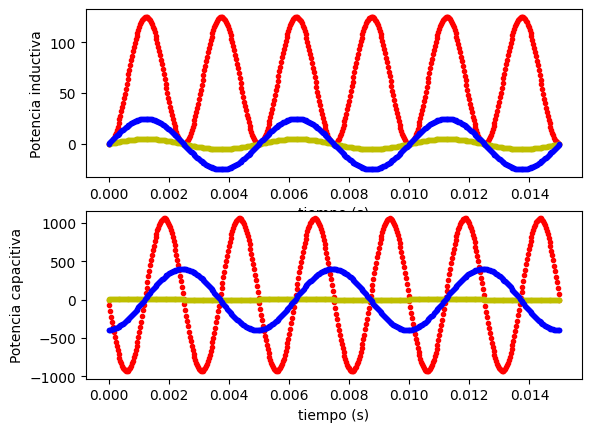

In [68]:
"----------Definiendo parámetros del circuito-----------"
#R:resistencia
#L:inductancia
#f:frecuencia
#To:tiempo de la señal
#Vm,Im: voltaje(corriente) pico
#Xl:Reactancia inductiva
#Xc:Reactancia capacitiva
#fase: Fase

"----------Para una impedancia inductiva---------------"

R=3
L=0.00001
C=0.00001
f=200
To=3/f
k=500
Vm=5
R=5
Xl=L*2*np.pi*f
Xc=1/(2*np.pi*f*C)

Im=Vm*np.sqrt((R**2)+(Xl**2))
fase=np.arctan(Xl/R)
tv=np.linspace(0,To,k)
v=Vm*np.sin(2*np.pi*f*tv)
i=Im*np.sin(2*np.pi*f*tv+fase)

p=i*v

plt.subplot(211)
plt.plot(tv,p,".r")
plt.plot(tv,v,".y")
plt.plot(tv,i,".b")
plt.xlabel("tiempo (s)")
plt.ylabel("Potencia inductiva")
plt.show

"----------Para una impedancia capacitiva---------------"

Im=Vm*np.sqrt((R**2)+(Xc**2))
fase=np.arctan(-Xc/R)
i=Im*np.sin(2*np.pi*f*tv+fase)
p=i*v

plt.subplot(212)
plt.plot(tv,p,".r")
plt.plot(tv,v,".y")
plt.plot(tv,i,".b")
plt.xlabel("tiempo (s)")
plt.ylabel("Potencia capacitiva")
plt.show


##**5_Señales_Energia_Potencia**
* **Discuta el concepto de valor RMS de una señal a partir de su potencia media**.


 Se tiene entonces una función
$$
v(t) = A\cos(w_0t), ~~~ w_0 = \frac{2\pi}{T_0}
$$

Su potencia media sería

$$
\bar{P}_v = \frac{1}{T_0} \int_0^{T_0} |A\cos(w_0t)|^{2}~dt\\
\bar{P}_v = \frac{A^{2}}{T_0} \left[\int_0^{T0} \frac{1}{2} ~dt + \int_0^{T0} \frac{\cos(2w_0t)}{2} ~dt  \right]\\
\bar{P}_v = \frac{A^{2}}{2}
$$





##**PROCESO DE ENCONTRAR GRAFICA EL VALOR RMS**

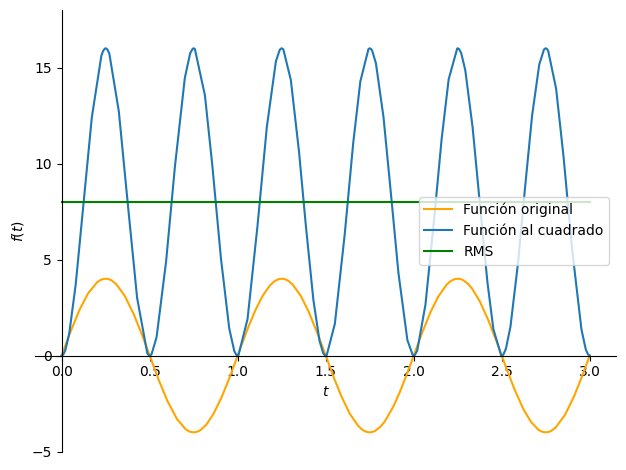

In [70]:
#@title Proceso de encontrar gráfica el valor  RMS
import warnings
warnings.filterwarnings("ignore")

w = symbols('w', real = True, nonzero = True)
t, I_max = symbols('t, I_max', real = True)
T0 = 2*pi/w

w0 = 2*pi
T0 = T0.subs(w, w0)
sig = 4*sym.sin(w0*t)
p_ins = sig ** 2
P = integrate(sig**2, (t, 0, T0)) /T0

t_limits = (t, 0, 3)
ylim=[-5, 18]
p1 = plot(sig, t_limits, ylim=ylim,show = False, line_color = 'orange', legend = True, label="Función original")
p2 = plot(p_ins, t_limits, ylim=ylim, show = False, legend = True, label="Función al cuadrado")
p3 = plot(P, t_limits, ylim=ylim, show = False, line_color = 'green', legend = True, label="RMS")
p1.extend(p2)
p1.extend(p3)
p1.show()

El valor RMS sería la línea verde del gráfico. Esta se encuentra para representar el promedio de la función. Ahora bien, como la función original (la función que aparece en naranja) tiene parte positiva y negativa, se le debe elevar al cuadrado cada intervalo, y esto daría como respuesta la señal que está en azul. A esta señal es la que se promedia para obtener el valor del RMS, la cual sería:
$$
RMS=\frac{A}{\sqrt{2}}
$$

Finalmente, clasifique la señal $x(t)=e^{-\alpha t}t$ como de energía o de potencia. *Compruebe el resultado solucionando la integral por partes.*

**R/** Procedimiento para energía:
$$
E_x = \int_{-\infty}^{\infty} |e^{-\alpha t}t|^{2}~dt\\
E_x = \int_{0}^{\infty} e^{-2\alpha t}~t^2~dt\\
$$

Haciendo una integral por partes se define que

$$
u=t^2\\
du=2tdt\\
dv=e^{-2\alpha t}\\
v=-\frac{1}{2\alpha}e^{-2\alpha t}
$$

Haciendo el procedimiento de integración por partes se obtiene

$$
u*v-\int v~du\\
t^2 (-\frac{1}{2\alpha}e^{-2\alpha t})-\int (-\frac{1}{2\alpha}e^{-2\alpha t})2t~dt\\
t^2(-\frac{1}{2\alpha}e^{-2\alpha t})+\frac{1}{\alpha}\int(e^{-2\alpha t}t) dt\\
t^2(-\frac{1}{2\alpha}e^{-2\alpha t})+\frac{1}{\alpha}\int(e^{-2\alpha t}t)dt\\
$$

Con la respuesta obtenida anterior , se procede a sacar nuevamente un integración por partes para llegar al resultado, se define:

$$
\int(e^{-2\alpha t}t)dt\\
u_2=t\\
du_2=dt\\
dv_2=e^{-2\alpha t}\\
v_2=-\frac{1}{2\alpha}e^{-2\alpha t}
$$

Resolviendo la integración
$$
t(-\frac{1}{2\alpha}e^{-2\alpha t})-\int(-\frac{1}{2\alpha}e^{-2\alpha t})\\
-\frac{t}{2\alpha e^{-2\alpha t}}+\frac{1}{2\alpha}\int(e^{-2\alpha t})dt\\
-\frac{t}{2\alpha e^{-2\alpha t}}+\frac{1}{4\alpha e^{-2\alpha t}}\\
\frac{-2t-1}{4\alpha e^{-2\alpha t}}\\
$$

Reemplazando el valor obtenido en la primera respuesta, de la primera integración se tiene que

$$
-t^{2} \frac{1}{2 \alpha e^{-2\alpha t}}+(\frac{1}{\alpha} )\frac{-2t-1}{4 \alpha e^{-2\alpha t}}
$$
Simplificado el resultado con operaciones básicas se teien que la solución de la integral indefinida es

$$
\frac{-2\alpha^2 t^2 -2\alpha t-1}{4\alpha^3 e^{2\alpha t}}
$$

Reemplazando se tendría que analizar así la siguiente ecuación en los límites de $-\infty$ a $\infty$.

$$
E_x = \frac{-2\alpha^2 t^2-2\alpha t-1}{4\alpha^3 e^{2\alpha t}}~\Big|_0^\infty\\
E_x = \frac{1}{4\alpha^3}
$$

Procedimiento para potencia media:

$$
\bar{P}_x = \lim_{T \to \infty} \frac{1}{T} \int_{0}^{\frac{T}{2}} |e^{-\alpha t}t|^{2}~dt\\
\bar{P}_x = \lim_{T \to \infty} \frac{1}{T} \int_{0}^{\frac{T}{2}} e^{-2\alpha t}t^2~dt\\
$$

Se resuelve la integral como se hizo en el  procedimiento anterior y se analiza el limite cuando $T->\infty$

$$
\bar{P}_x = \lim_{T \to \infty} \frac{1}{T} \left[  \frac{-2\alpha^2 t^2-2\alpha t-1}{4\alpha^3 e^{2\alpha t}}~\Big|_0^\frac{T}{2} \right]\\
\bar{P}_x = \lim_{T \to \infty} \frac{1}{T} \left[  \frac{-2\alpha^2 (\frac{T^{2}}{4})^2-2\alpha (\frac{T}{2})-1}{4\alpha^3 e^{2\alpha (\frac{T}{2})}}-\frac{-1}{4\alpha^3 } \right]\\
$$

Como la energía es finita, al hacer el limite, nos indica que la potencia para esta ecuación tiende a 0.

$$\bar{P}_x = 0$$

Se puede entonces concluir que esta señal es de **energía**, ya que tiene un intervalo definido y un resultado finito.

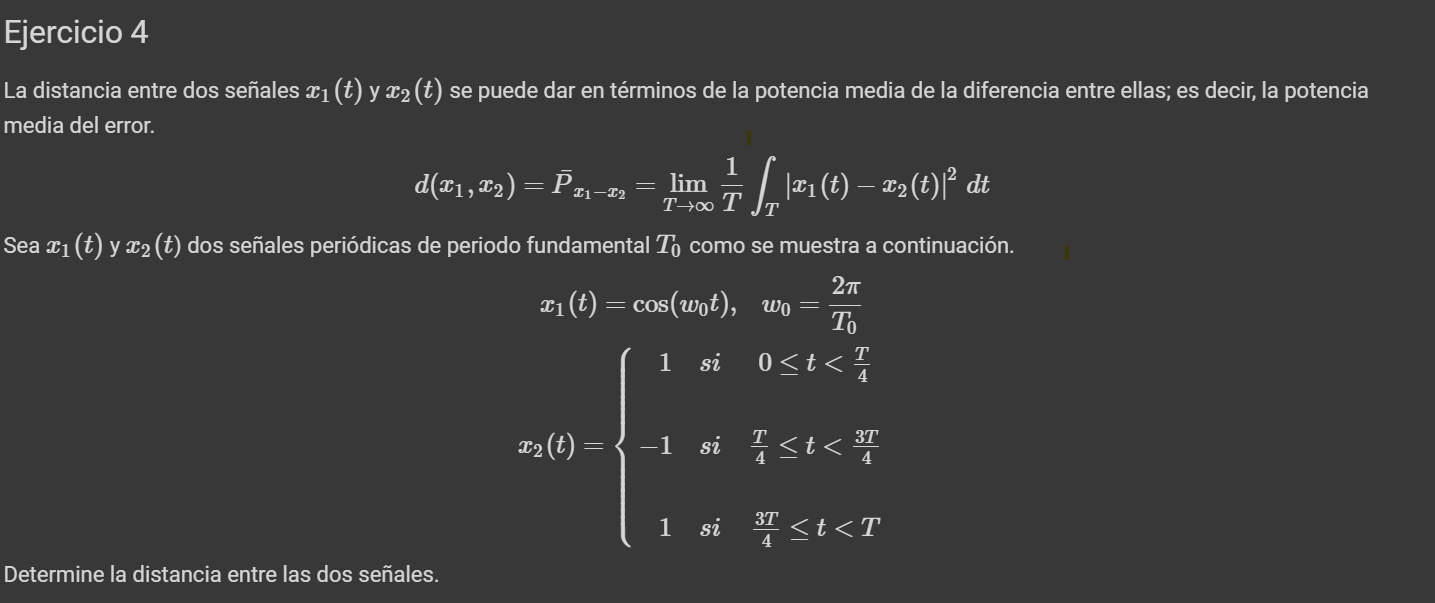

### **Solución**:
$$
d(x_1,x_2)=\displaystyle\lim_{T \to \infty}(\int_0^{\frac{T}{4}} \{cos^2(\omega_0t) -2cos(\omega_0 t)(1)+1^2\} +\int_{\frac{T}{4}}^{\frac{3T}{4}} \{cos^2(\omega_0t) -2cos(\omega_0t)(-1)+(-1)^2\}+\int_{\frac{3T}{4}}^{T} \{cos^2(\omega_0t) -2cos(\omega_0t)(1)+(1)^2)\}\\
$d(x_1,x_2)=\displaystyle\lim_{T \to \infty}(\int_0^{\frac{T}{4}} \{cos^2(\omega_0t) -2cos(\omega_0 t)+1\} +\int_{\frac{T}{4}}^{\frac{3T}{4}} \{cos^2(\omega_0t) +2cos(\omega_0t)+1\}+\int_{\frac{3T}{4}}^{T} \{cos^2(\omega_0t) -2cos(\omega_0t)+1)\}
$$

Integrando:

$$
d(x_1,x_2)=\lim\limits_{T\to \infty}\frac{1}{T}([\frac{3t}{2}-\frac{2\sin(\omega_0t)}{\omega_0}+\frac{\sin(2\omega_0 t)}{4\omega_0}]_{0}^{T/4}+[\frac{3t}{2}+\frac{2\sin(\omega_0t)}{\omega_0}+\frac{\sin(2\omega_0 t)}{4\omega_0}]_{T/4}^{3T/4}+[\frac{3t}{2}-\frac{2\sin(\omega_0t)}{\omega_0}+\frac{\sin(2\omega_0 t)}{4\omega_0}]_{3T/4}^{T})\\
d(x_1,x_2)=\lim\limits_{T\to \infty}\frac{1}{T}([\frac{6 t \omega _0-8 \sin \left(t \omega _0\right)+\sin \left(2 t \omega _0\right)}{4 \omega _0}]_{0}^{T/4}+[\frac{6 t \omega _0+8 \sin \left(t \omega _0\right)+\sin \left(2 t \omega _0\right)}{4 \omega _0}]_{T/4}^{3T/4}+[\frac{6 t \omega _0-8 \sin \left(t \omega _0\right)+\sin \left(2 t \omega _0\right)}{4 \omega _0}]_{3T/4}^{T})\\
d(x_1,x_2)=\lim\limits_{T \to \infty}\frac{6 T \omega _0+\sin \left(2 T \omega _0\right)+64 \sin ^3\left(\frac{T \omega _0}{8}\right) \left(\cos \left(\frac{3 T \omega _0}{8}\right)+\cos \left(\frac{5 T \omega _0}{8}\right)\right)}{4 \omega _0}
$$

Simplificando:

$$
d(x_1,x_2)=\displaystyle \lim_{T \to \infty}\frac{6 T \omega _0+\sin \left(2 T \omega _0\right)+64 \sin ^3\left(\frac{T \omega _0}{8}\right) \left(\cos \left(\frac{3 T \omega _0}{8}\right)+\cos \left(\frac{5 T \omega _0}{8}\right)\right)}{4 T \omega _0}
$$

Remplazando $\omega_0=\frac{2 \pi}{T} $ se tiene entonces

$$
d(x_1,x_2)=\displaystyle \lim_{T \to \infty}\frac{12 \pi -32}{8 \pi }=\frac{12 \pi -32}{8 \pi }=0,2268
$$

Se dice entonces que la distancia entre las señales $x_1(t)$ y $x_2(t)$ es 0,2268.

##**5_Señales_Energia_Potencia**
* **Demostrar que la norma al cuadrado de una señal equivale a su energía**.



**R/** $x=[x_1,x_2]$

La norma estaría dada por la siguiente ecuación

$$
||x||=\sqrt{x_2^2+x_1^2}
$$

Al ver que dentro de la raíz es la suma al cuadrado de la cada señal, se podría reescribir esta expresión como una sumatoria de la siguiente manera.

$$
||x(t)||=\displaystyle \sqrt{\sum_{n=1}^N|x_n|^2}
$$

Luego se aplica la integral que describe la señal de energía

$$
||x(t)||=\displaystyle\sqrt{\int_{-T/2}^{T/2}|x(t)|^2dt}
$$

Se quiere deshacer de la raíz cuadrada, entonces se eleva al cuadrado en ambas partes, entonces se tendría

$$
||x(t)||^2=\displaystyle \int_{-T/2}^{T/2}|x(t)|^2 dt
$$

Por lo que al final se puede concluir que la norma al cuadrado de una señal equivale a su energía.

# *2_SLIT* - **1_Convolucion**



En el cuarto paso, la evaluación de las integrales de convolución para los tres casos se deja abierta como un ejercicio. Tenga en cuenta que, en el primer caso, no se superponen, es decir que $y(t)=0$ para $t<0$.

La convolución $y(t) = x(t) * h(t)$ se realizará a partir de las siguientes señales

\begin{align}
h(t) &= e^{-t} \\
x(t) &= \text{rect} \left(t - \frac{1}{2}\right)
\end{align}


**1.** Para $ h(τ)$
$$
y (t)=\int_{-\infty }^{\infty}(rect(\tau - \frac{1}{2}))e^{-\tau}d\tau \\
$$

como $y(t)=0$ cuando t $<$ 0

$$
y(t) = \int_{0}^{\infty} rect(\tau - \frac{1}{2}) e^{-\tau}d\tau \\
$$

como es una función rectangular, se redefine los limites de integración:

$$
y(t)= \int_{0}^{1} rect(\tau - \frac{1}{2}) e^{-\tau}\\
y(t) = \int_{0}^{1} e^{-\tau} d\tau\\
y(t)= -e^{-\tau} \Big|_{0}^{1}=-e^{-1}+e^0=-e^{-1}= 0.6321\\
$$


**2.** Para $ h(-τ)$
$$
y(t) = \int_{- \infty}^{\infty} (rect(\tau - \frac{1}{2}))e^{-(- \tau)} d\tau\\
$$

como $y(t)=0$ cuando $t<0$

$$
y(t) = \int_{0}^{\infty} rect(\tau - \frac{1}{2}) e^{ \tau} d\tau\\
$$

como es una fucion rectangular, se redefine los limites de integración

$$
y(t)= \int_{0}^{1} rect(\tau - \frac {1}{2}) e^{-\tau}  \to y(t) = \int_{0}^{1} e^\tau d\tau\\
y(t) = e^\tau | _{0}^{1} = e^1 - e^0 = e^1 - 1 = 1.7182\\
$$

**3.** Para $ h(t-τ)$

$$
y(t)= \int_{- \infty}^{\infty}(rect(\tau - \frac{1}{2})) e^{-(t-\tau)}d\tau\\
$$

como $y(t)=0$ cuando $t<0$

$$
y(t)=\int_{0}^{\infty} rect(\tau - \frac{1}{2}) e^{\tau-t} d\tau\\
$$

como es una funcion rectangular, se redefine los limites de integracion

$$
y(t)= \int_{0}^{1} rect(\tau - \frac{1}{2}) e^{\tau - t}d\tau \to y(t)=\int_{0}{1} d\tau\\
y(t) = \int_{0}^{1} e^{-t} e^\tau d\tau\\
y(t) = e^{-t} \int_{0}^{1} e^\tau d\tau\\
y(t) = 1.7182 e^{-t}
$$

# *2_SLIT*-**2_Respuesta_Impulso.**

**1.** Compare la señal de salida obtenida al resolver la EDO con la obtenida mediante la convolución. ¿Son iguales?

**R/** Sí, las gráficas son iguales, ya que tienen los mismos límites y en el mismo punto de $y$ empieza a bajar.

**2.** Compruebe la solución $h(t)$ de la EDO cuando $x(t)=\delta(t)$ de manera manual. Tener en cuenta que $\frac{d}{dt} \epsilon(t) = \delta(t)$.

**R/** Procedimiento:

Se define la EDO
$$
\frac{d}{dt}y+p(t)y=q(t)
$$

Tomando como referencia nuestra ecuación, se puede decir que

$$
p(t)=1\\
q(t)=e^{-2t}
$$

La EDO quedaría de la siguiente manera

$$
\frac{d}{dt}y+y=e^{-2t}
$$

Se quiere encontrar el valor de $\mu$, entonces se reemplaza en la fórmula $\mu=e^{\int p(x)dt}$ y como se tiene el valor de $p(x)=1$ se reemplaza en la ecuación y daría que $\mu=e^t$.

Luego, para poder resolver la EDO, se aplica la fórmula

$$
y\cdot\mu=\int q\cdot \mu~dt
$$

Reemplazamos valores y quedaría

$$
y\cdot e^t=\int e^{-2t}e^t~dt\\
y\cdot e^t=\int e^{-t}~dt\\
y\cdot e^t=-e^{-t}+C\\
y=\frac{-e^{-t}}{e^t}+\frac{C}{e^t}\\
y=-e^{-2t}+C\cdot e^{-t}
$$

**3.** Comprobar la solución de la integral de convolución de manera manual. Tener en cuenta las funciones Heaviside.

**R/** Ahora se hará la solución de la integral de convolución.

$$
y(t)=\int_0^t x(\tau)h(t-\tau)~d\tau\\
$$

Reemplazando valores quedaría

$$
y(t)=\int_0^t e^{-2\tau}\epsilon(\tau)~d\tau
$$

Como $\epsilon(t)$ es como un impulso, simplemente valdría uno. La integral se resolvería por sustitución siendo $u=-2t$ y $du=-2dt$ (o sea, $dt=\frac{du}{-2}$)

$$
y(t)=\int-\frac{1}{2}e^u~du\\
y(t)=-\frac{1}{2}\int e^u~du\\
y(t)=-\frac{1}{2}(e^{-2t}\Big |_0^t)\\
y(t)=-\frac{1}{2}(e^{-2t}-1)\\
y(t)=\frac{1}{2}-\frac{e^{-2t}}{2}
$$